# Data analysis

The selection criteria for data metrics encompass the following aspects:

1. **Relevance:** A metric is considered relevant when it effectively assesses the intended phenomenon or objective. In the realm of congestion analysis, it precisely gauges and evaluates congestion levels within the area.

2. **Sensitivity to Traffic Variations:** Sensitivity denotes a metric's responsiveness to shifts in data or conditions. For congestion analysis, it identifies and quantifies fluctuations in congestion within the area.

3. **Granularity:** Granularity characterizes a metric's capability to provide intricate and specific measurements. This enables precise analysis by furnishing information at a suitable level of detail.

4. **Interpretability:** Interpretability ensures that a metric's results are easily understood and interpretable. In the context of congestion analysis, it offers clear insights into congestion levels, aiding decision-making.

5. **Data Availability:** A metric is deemed available when it's accessible and applicable for analyzing the given phenomenon.

6. **Robustness:** Robustness reflects a metric's resistance to data variations or errors. In the study of congestion, it remains unaffected by changes, errors, or disturbances in congestion data.

In [10]:
## Importing libraries
import sys
assert sys.version_info >= (3, 7)
from packaging import version
from PIL import Image
import sklearn
import numpy as np
import matplotlib.pyplot as plt
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import seaborn as sns
from matplotlib.pyplot import plot, show, legend, xlabel, ylabel
%matplotlib inline

In [11]:
## Importing data
dz_ach1_mgp_to_rp1 = pd.read_csv('data_zones/z_ach1_mgp_to_rp1.csv')
dz_grgn_to_rp1 = pd.read_csv('data_zones/z_grgn_to_rp1.csv')
dz_r2pn_to_rp1 = pd.read_csv('data_zones/z_r2pn_to_rp1.csv')
dz_rp2_to_rp3 = pd.read_csv('data_zones/z_rp2_to_rp3.csv')
dz_rp4_to_rp3 = pd.read_csv('data_zones/z_rp4_to_rp3.csv')
dz_ccb_to_rp4 = pd.read_csv('data_zones/z_ccb_to_rp4.csv')
dz_plsr_to_rp1 = pd.read_csv('data_zones/z_plsr_to_rp1.csv')
dz_r2ps_to_ach1_mgp = pd.read_csv('data_zones/z_r2ps_to_ach1_mgp.csv')
dz_rp3_to_rp4 = pd.read_csv('data_zones/z_rp3_to_rp4.csv')
dz_rp5_to_rp4 = pd.read_csv('data_zones/z_rp5_to_rp4.csv')

In [12]:
#Métriques disponibles
dz_r2ps_to_ach1_mgp.dtypes

interval_begin                          float64
interval_end                            float64
interval_haltingDurationSum             float64
interval_id                              object
interval_intervalHaltingDurationSum     float64
interval_jamLengthInMetersSum           float64
interval_jamLengthInVehiclesSum           int64
interval_maxHaltingDuration             float64
interval_maxIntervalHaltingDuration     float64
interval_maxJamLengthInMeters           float64
interval_maxJamLengthInVehicles           int64
interval_maxOccupancy                   float64
interval_maxVehicleNumber                 int64
interval_meanHaltingDuration            float64
interval_meanIntervalHaltingDuration    float64
interval_meanMaxJamLengthInMeters       float64
interval_meanMaxJamLengthInVehicles     float64
interval_meanOccupancy                  float64
interval_meanSpeed                      float64
interval_meanTimeLoss                   float64
interval_meanVehicleNumber              

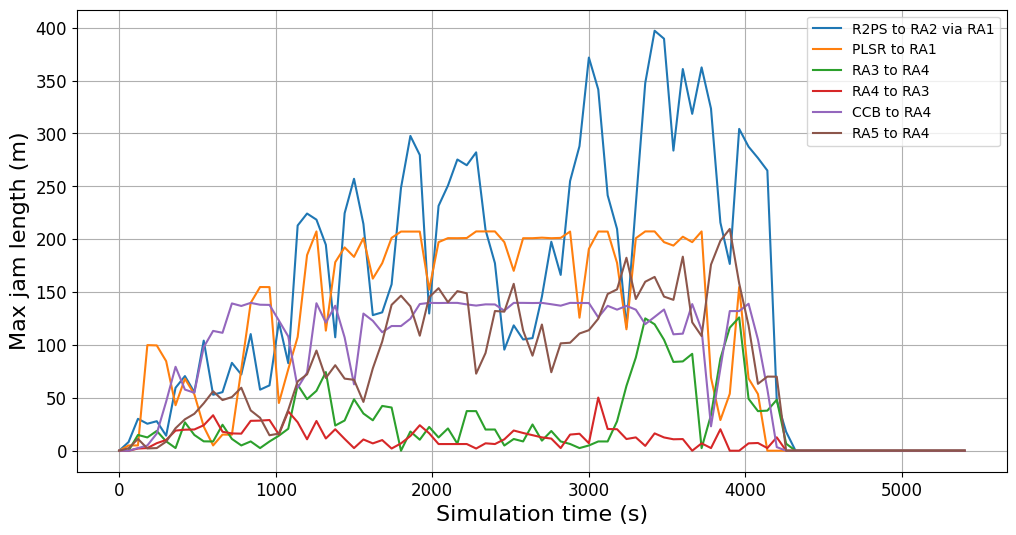

In [60]:
import numpy as np

mean_jam_dz_r2ps_to_ach1_mgp = dz_r2ps_to_ach1_mgp.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()
mean_jam_dz_rp3_to_rp4 = dz_rp3_to_rp4.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()
mean_jam_dz_ccb_to_rp4 = dz_ccb_to_rp4.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()
mean_jam_dz_rp5_to_rp4 = dz_rp5_to_rp4.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()
mean_jam_dz_rp2_to_rp3 = dz_rp2_to_rp3.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()
mean_jam_dz_rp4_to_rp3 = dz_rp4_to_rp3.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()
mean_jam_dz_r2pn_to_rp1 = dz_r2pn_to_rp1.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()
mean_jam_dz_plsr_to_rp1 = dz_plsr_to_rp1.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()
mean_jam_dz_grgn_to_rp1 = dz_grgn_to_rp1.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

plt.figure(figsize=(12, 6))

plt.plot(mean_jam_dz_r2ps_to_ach1_mgp.index, mean_jam_dz_r2ps_to_ach1_mgp, label='R2PS to RA2 via RA1')
plt.plot(mean_jam_dz_plsr_to_rp1.index, mean_jam_dz_plsr_to_rp1, label='PLSR to RA1')
plt.plot(mean_jam_dz_rp3_to_rp4.index, mean_jam_dz_rp3_to_rp4, label='RA3 to RA4')
plt.plot(mean_jam_dz_rp4_to_rp3.index, mean_jam_dz_rp4_to_rp3, label='RA4 to RA3')
plt.plot(mean_jam_dz_ccb_to_rp4.index, mean_jam_dz_ccb_to_rp4, label='CCB to RA4')
plt.plot(mean_jam_dz_rp5_to_rp4.index, mean_jam_dz_rp5_to_rp4, label='RA5 to RA4')

#plt.plot(mean_jam_dz_rp2_to_rp3.index, mean_jam_dz_rp2_to_rp3, label='Jam length from RA2 to RA3')
#plt.plot(mean_jam_dz_r2pn_to_rp1.index, mean_jam_dz_r2pn_to_rp1, label='Jam length from R2PN to RA1')
#plt.plot(mean_jam_dz_grgn_to_rp1.index, mean_jam_dz_grgn_to_rp1, label='Jam length from GRGN to RA1')


# plt.title('Diagram Max Jam length vs Simulation time', fontsize=16)
plt.legend()
plt.xlabel('Simulation time (s)', fontsize=16)
plt.ylabel('Max jam length (m)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()

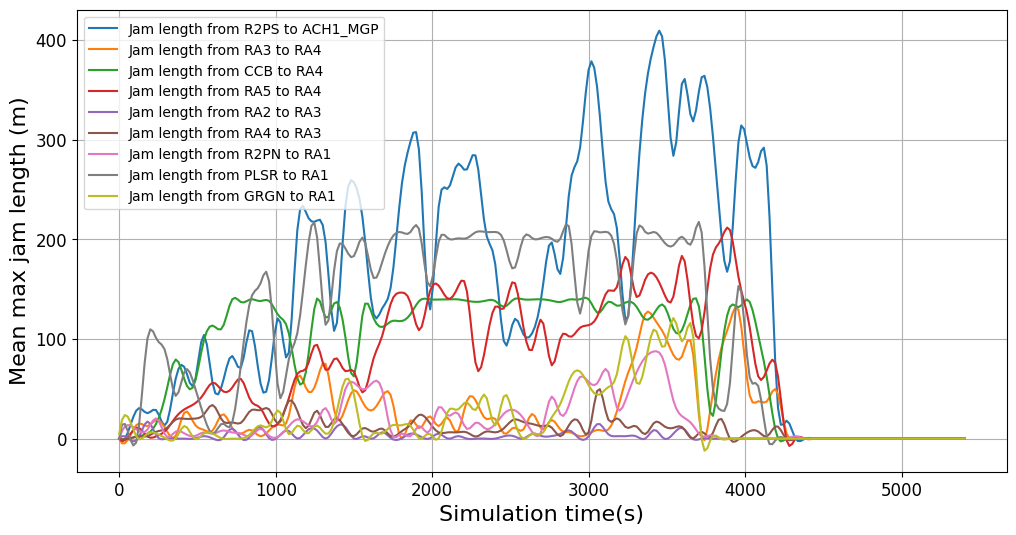

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Define the datasets and corresponding labels
datasets = [
    (dz_r2ps_to_ach1_mgp, 'Jam length from R2PS to ACH1_MGP'),
    (dz_rp3_to_rp4, 'Jam length from RA3 to RA4'),
    (dz_ccb_to_rp4, 'Jam length from CCB to RA4'),
    (dz_rp5_to_rp4, 'Jam length from RA5 to RA4'),
    (dz_rp2_to_rp3, 'Jam length from RA2 to RA3'),
    (dz_rp4_to_rp3, 'Jam length from RA4 to RA3'),
    (dz_r2pn_to_rp1, 'Jam length from R2PN to RA1'),
    (dz_plsr_to_rp1, 'Jam length from PLSR to RA1'),
    (dz_grgn_to_rp1, 'Jam length from GRGN to RA1')
]

plt.figure(figsize=(12, 6))

for dataset, label in datasets:
    # Compute mean jam length
    mean_jam_length = dataset.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

    # Create a new set of x values for smoother interpolation
    x_new = np.linspace(mean_jam_length.index.min(), mean_jam_length.index.max(), 300)

    # Perform cubic spline interpolation
    spline = make_interp_spline(mean_jam_length.index, mean_jam_length)

    # Plot the interpolated data with curved lines
    plt.plot(x_new, spline(x_new), label=label)

# plt.title('Diagram: Maximum jam length vs Simulation time', fontsize=16)
plt.legend()
plt.xlabel('Simulation time(s)', fontsize=16)
plt.ylabel('Mean max jam length (m)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Afficher le graphique
plt.show()

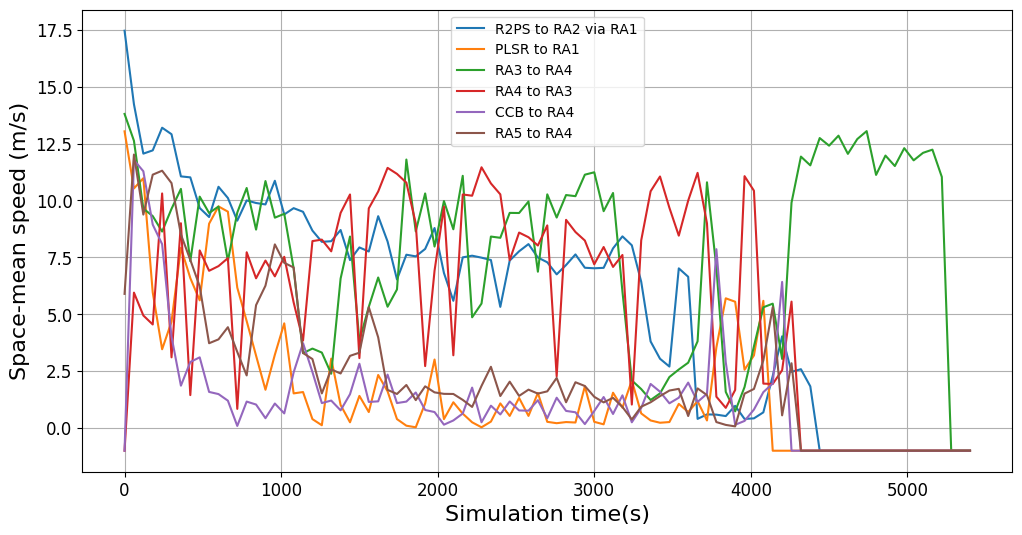

In [61]:
import numpy as np


# Analysis of mean speed dans les zones d'interet
mean_speed_dz_r2ps_to_ach1_mgp = dz_r2ps_to_ach1_mgp.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_speed_dz_rp3_to_rp4 = dz_rp3_to_rp4.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_speed_dz_ccb_to_rp4 = dz_ccb_to_rp4.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_speed_dz_rp5_to_rp4 = dz_rp5_to_rp4.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_speed_dz_rp2_to_rp3 = dz_rp2_to_rp3.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_speed_dz_rp4_to_rp3 = dz_rp4_to_rp3.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_speed_dz_r2pn_to_rp1 = dz_r2pn_to_rp1.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_speed_dz_plsr_to_rp1 = dz_plsr_to_rp1.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_speed_dz_grgn_to_rp1 = dz_grgn_to_rp1.groupby('interval_begin')['interval_meanSpeed'].mean()

plt.figure(figsize=(12, 6))

#plt.plot(mean_speed_dz_r2ps_to_ach1_mgp.index, mean_speed_dz_r2ps_to_ach1_mgp, label='Mean speed from R2PS to ACH1_MGP')
#plt.plot(mean_speed_dz_rp3_to_rp4.index, mean_speed_dz_rp3_to_rp4, label='Mean speed from RA3 to RA4')
#plt.plot(mean_speed_dz_ccb_to_rp4.index, mean_speed_dz_ccb_to_rp4, label='Mean speed from CCB to RA4')
#plt.plot(mean_speed_dz_rp5_to_rp4.index, mean_speed_dz_rp5_to_rp4, label='Mean speed from RA5 to RA4')
#plt.plot(mean_speed_dz_rp2_to_rp3.index, mean_speed_dz_rp2_to_rp3, label='Mean speed from RA2 to RA3')
#plt.plot(mean_speed_dz_rp4_to_rp3.index, mean_speed_dz_rp4_to_rp3, label='Mean speed from RA4 to RA3')
#plt.plot(mean_speed_dz_r2pn_to_rp1.index, mean_speed_dz_r2pn_to_rp1, label='Mean speed from R2PN to RA1')
#plt.plot(mean_speed_dz_plsr_to_rp1.index, mean_speed_dz_plsr_to_rp1, label='Mean speed from PLSR to RA1')
#plt.plot(mean_speed_dz_grgn_to_rp1.index, mean_speed_dz_grgn_to_rp1, label='Mean speed from GRGN to RA1')

plt.plot(mean_speed_dz_r2ps_to_ach1_mgp.index, mean_speed_dz_r2ps_to_ach1_mgp, label='R2PS to RA2 via RA1')
plt.plot(mean_speed_dz_plsr_to_rp1.index, mean_speed_dz_plsr_to_rp1, label='PLSR to RA1')
plt.plot(mean_speed_dz_rp3_to_rp4.index, mean_speed_dz_rp3_to_rp4, label='RA3 to RA4')
plt.plot(mean_speed_dz_rp4_to_rp3.index, mean_speed_dz_rp4_to_rp3, label='RA4 to RA3')
plt.plot(mean_speed_dz_ccb_to_rp4.index, mean_speed_dz_ccb_to_rp4, label='CCB to RA4')
plt.plot(mean_speed_dz_rp5_to_rp4.index, mean_speed_dz_rp5_to_rp4, label='RA5 to RA4')



# Modifier la taille de police des noms d'axes et des valeurs sur les axes
# plt.title('Diagram: Max Mean speed vs Simulation time', fontsize=16)
plt.legend()
plt.xlabel('Simulation time(s)', fontsize=16)
plt.ylabel('Space-mean speed (m/s)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

# Afficher le graphique
plt.show()

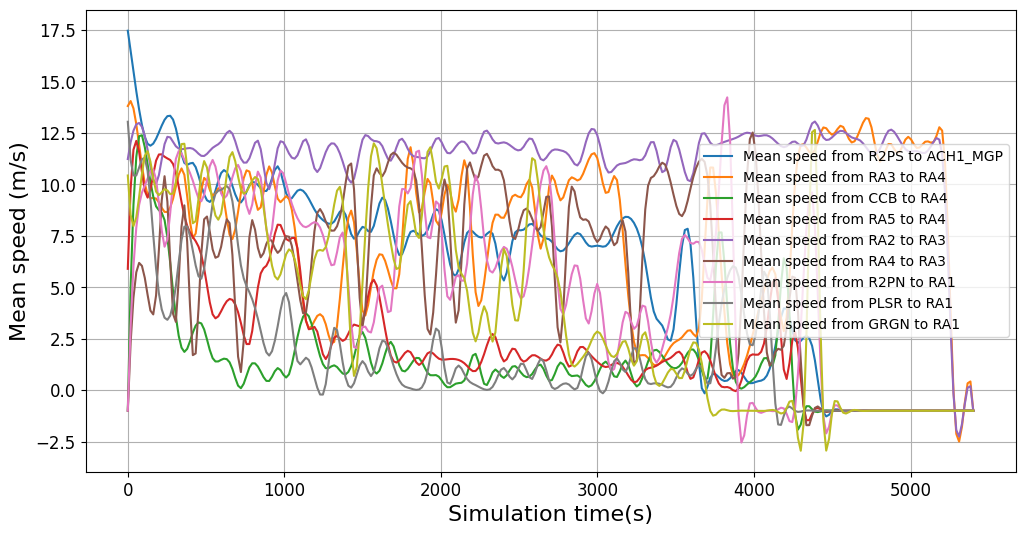

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Define the datasets and corresponding labels
datasets = [
    (dz_r2ps_to_ach1_mgp, 'Mean speed from R2PS to ACH1_MGP'),
    (dz_rp3_to_rp4, 'Mean speed from RA3 to RA4'),
    (dz_ccb_to_rp4, 'Mean speed from CCB to RA4'),
    (dz_rp5_to_rp4, 'Mean speed from RA5 to RA4'),
    (dz_rp2_to_rp3, 'Mean speed from RA2 to RA3'),
    (dz_rp4_to_rp3, 'Mean speed from RA4 to RA3'),
    (dz_r2pn_to_rp1, 'Mean speed from R2PN to RA1'),
    (dz_plsr_to_rp1, 'Mean speed from PLSR to RA1'),
    (dz_grgn_to_rp1, 'Mean speed from GRGN to RA1')
]

plt.figure(figsize=(12, 6))

for dataset, label in datasets:
    # Compute mean jam length
    mean_speed = dataset.groupby('interval_begin')['interval_meanSpeed'].mean()

    # Create a new set of x values for smoother interpolation
    x_new = np.linspace(mean_speed.index.min(), mean_speed.index.max(), 300)

    # Perform cubic spline interpolation
    spline = make_interp_spline(mean_speed.index, mean_speed)

    # Plot the interpolated data with curved lines
    plt.plot(x_new, spline(x_new), label=label)

# Modifier la taille de police des noms d'axes et des valeurs sur les axes
# plt.title('Diagram: Mean speed vs Simulation time', fontsize=16)
plt.legend()
plt.xlabel('Simulation time(s)', fontsize=16)
plt.ylabel('Mean speed (m/s)', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)

plt.show()


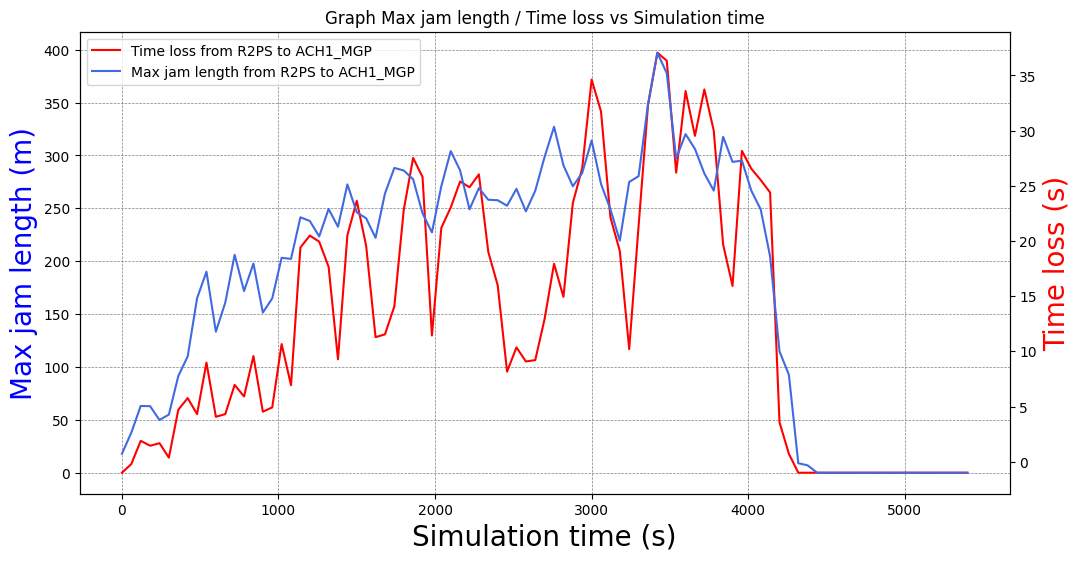

In [17]:
# Calculating the mean values of the "JamLength_r2ps_to_auchan_mgp" column for each simulation interval
mean_time_loss_1 = dz_r2ps_to_ach1_mgp.groupby('interval_begin')['interval_meanTimeLoss'].mean()
mean_jam_length_1 = dz_r2ps_to_ach1_mgp.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

# Creating the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first curve on y1-axis
ax1.plot(mean_jam_length_1.index, mean_jam_length_1, label='Time loss from R2PS to ACH1_MGP', color='red')
ax1.set_xlabel('Simulation time (s)')
ax1.set_ylabel('Max jam length (m)', color='blue')
ax1.tick_params('y', colors='black')

# Creating a second y2-axis
ax2 = ax1.twinx()

# Plotting the second curve on y2-axis
ax2.plot(mean_time_loss_1.index, mean_time_loss_1, label='Max jam length from R2PS to ACH1_MGP', color='royalblue')
ax2.set_ylabel('Time loss (s)', color='red')
ax2.tick_params('y', colors='black')

# Combining the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding the title
plt.title('Graph Max jam length / Time loss vs Simulation time')

# Increasing the font size of all axis titles
ax1.title.set_fontsize(20)
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

# Displaying the grid in the background
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Display the graph
plt.show()


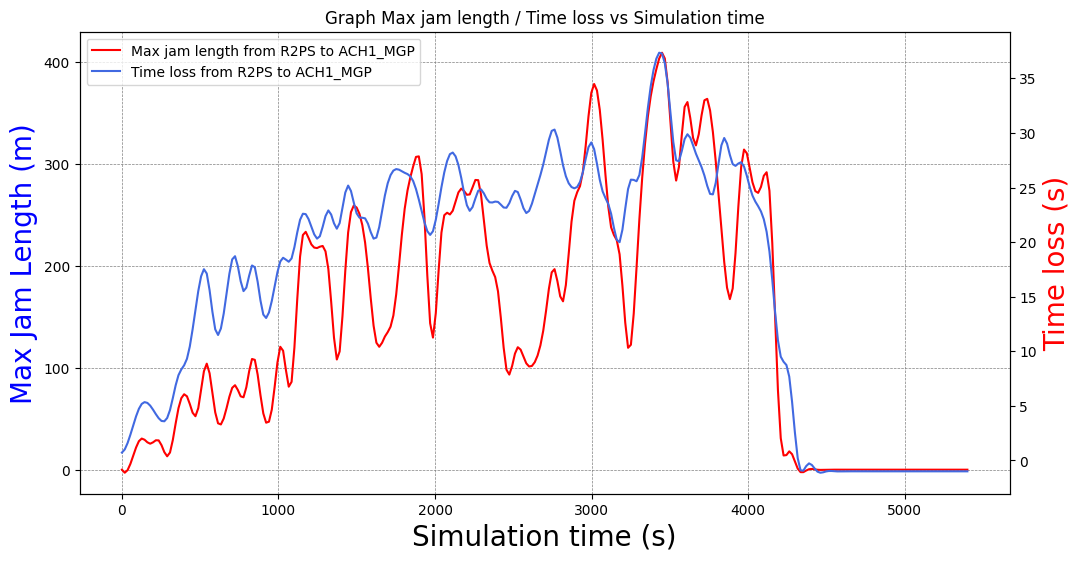

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Calculating the mean values of the "JamLength_r2ps_to_auchan_mgp" column for each simulation interval
mean_time_loss_1 = dz_r2ps_to_ach1_mgp.groupby('interval_begin')['interval_meanTimeLoss'].mean()
mean_jam_length_1 = dz_r2ps_to_ach1_mgp.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

# Create a new set of x values for smoother interpolation
x1_new = np.linspace(mean_jam_length_1.index.min(), mean_jam_length_1.index.max(), 300)

# Perform cubic spline interpolation for the jam length data
spline_jam_length = make_interp_spline(mean_jam_length_1.index, mean_jam_length_1)
jam_length_smooth = spline_jam_length(x1_new)

x2_new = np.linspace(mean_time_loss_1.index.min(), mean_time_loss_1.index.max(), 300)

# Perform cubic spline interpolation for the time loss data
spline_time_loss = make_interp_spline(mean_time_loss_1.index, mean_time_loss_1)
time_loss_smooth = spline_time_loss(x2_new)

# Creating the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first curve on y1-axis with curved line
ax1.plot(x1_new, jam_length_smooth, label='Max jam length from R2PS to ACH1_MGP', color='red')
ax1.set_xlabel('Simulation time (s)')
ax1.set_ylabel('Max Jam Length (m)', color='blue')
ax1.tick_params('y', colors='black')

# Creating a second y2-axis
ax2 = ax1.twinx()

# Plotting the second curve on y2-axis with curved line
ax2.plot(x2_new, time_loss_smooth, label='Time loss from R2PS to ACH1_MGP', color='royalblue')
ax2.set_ylabel('Time loss (s)', color='red')
ax2.tick_params('y', colors='black')

# Combining the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding the title
plt.title('Graph Max jam length / Time loss vs Simulation time')

# Increasing the font size of all axis titles
ax1.title.set_fontsize(20)
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

# Displaying the grid in the background
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Display the graph
plt.show()


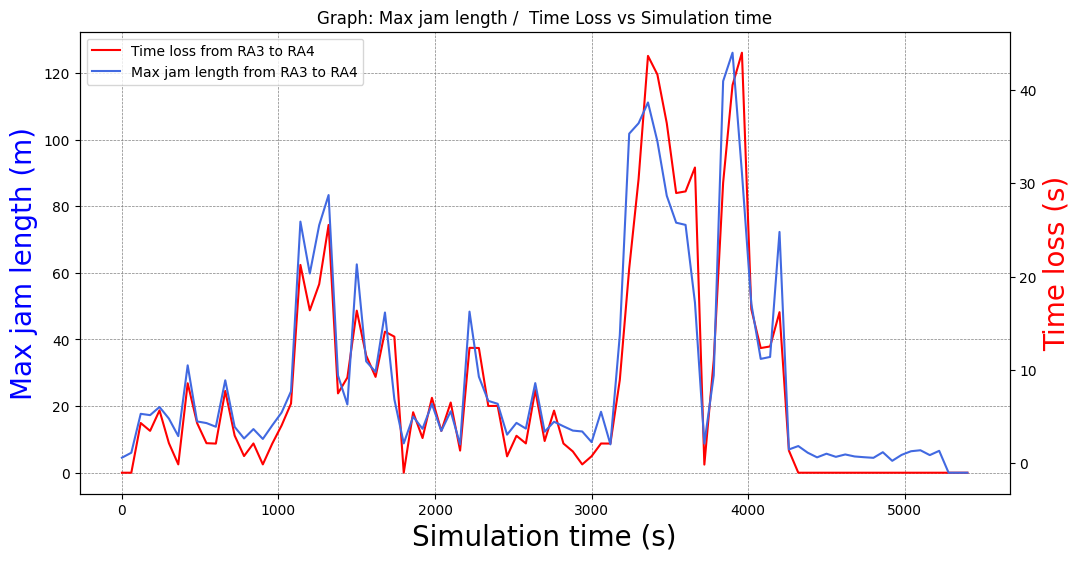

In [19]:
# Calculating the mean values of the "JamLength_r2ps_to_auchan_mgp" column for each simulation interval
mean_time_loss_1 = dz_rp3_to_rp4.groupby('interval_begin')['interval_meanTimeLoss'].mean()
mean_jam_length_1 = dz_rp3_to_rp4.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

# Creating the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first curve on y1-axis
ax1.plot(mean_jam_length_1.index, mean_jam_length_1, label='Time loss from RA3 to RA4', color='red')
ax1.set_xlabel('Simulation time (s)')
ax1.set_ylabel('Max jam length (m)', color='blue')
ax1.tick_params('y', colors='black')

# Creating a second y2-axis
ax2 = ax1.twinx()

# Plotting the second curve on y2-axis
ax2.plot(mean_time_loss_1.index, mean_time_loss_1, label='Max jam length from RA3 to RA4',color='royalblue')
ax2.set_ylabel('Time loss (s)', color='red')
ax2.tick_params('y', colors='black')

# Combining the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding the title
plt.title('Graph: Max jam length /  Time Loss vs Simulation time')

# Increasing the font size of all axis titles
ax1.title.set_fontsize(20)
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

# Displaying the grid in the background
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Display the graph
plt.show()

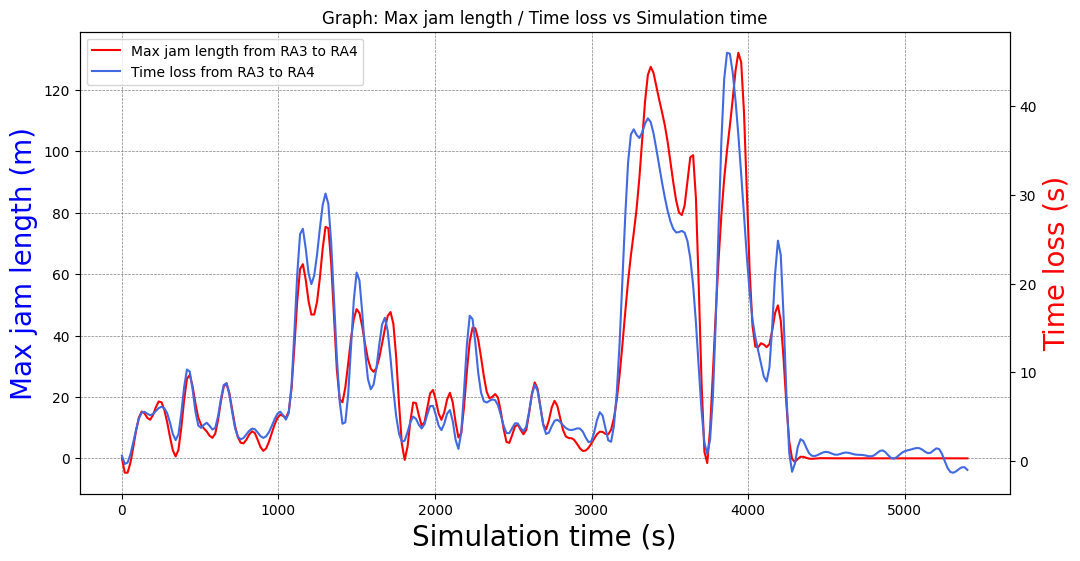

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Calculating the mean values of the "JamLength_r2ps_to_auchan_mgp" column for each simulation interval
mean_time_loss_1 = dz_rp3_to_rp4.groupby('interval_begin')['interval_meanTimeLoss'].mean()
mean_jam_length_1 = dz_rp3_to_rp4.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

# Create a new set of x values for smoother interpolation
x1_new = np.linspace(mean_jam_length_1.index.min(), mean_jam_length_1.index.max(), 300)

# Perform cubic spline interpolation for the jam length data
spline_jam_length = make_interp_spline(mean_jam_length_1.index, mean_jam_length_1)
jam_length_smooth = spline_jam_length(x1_new)

x2_new = np.linspace(mean_time_loss_1.index.min(), mean_time_loss_1.index.max(), 300)

# Perform cubic spline interpolation for the time loss data
spline_time_loss = make_interp_spline(mean_time_loss_1.index, mean_time_loss_1)
time_loss_smooth = spline_time_loss(x2_new)

# Creating the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first curve on y1-axis with curved line
ax1.plot(x1_new, jam_length_smooth, label='Max jam length from RA3 to RA4', color='red')
ax1.set_xlabel('Simulation time (s)')
ax1.set_ylabel('Max jam length (m)', color='blue')
ax1.tick_params('y', colors='black')

# Creating a second y2-axis
ax2 = ax1.twinx()

# Plotting the second curve on y2-axis with curved line
ax2.plot(x2_new, time_loss_smooth, label='Time loss from RA3 to RA4', color='royalblue')
ax2.set_ylabel('Time loss (s)', color='red')
ax2.tick_params('y', colors='black')

# Combining the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding the title
plt.title('Graph: Max jam length / Time loss vs Simulation time')

# Increasing the font size of all axis titles
ax1.title.set_fontsize(20)
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

# Displaying the grid in the background
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Display the graph
plt.show()


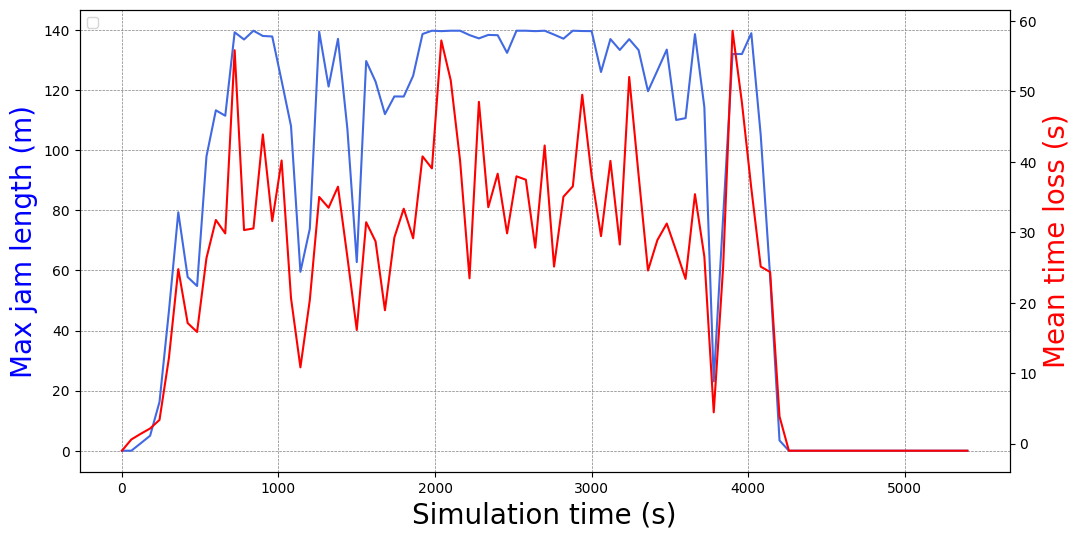

In [71]:
# Calculating the mean values of the "JamLength_r2ps_to_auchan_mgp" column for each simulation interval
mean_time_loss_1 = dz_ccb_to_rp4.groupby('interval_begin')['interval_meanTimeLoss'].mean()
mean_jam_length_1 = dz_ccb_to_rp4.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

# Creating the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first curve on y1-axis
ax1.plot(mean_jam_length_1.index, mean_jam_length_1, color='royalblue')
ax1.set_xlabel('Simulation time (s)')
ax1.set_ylabel('Max jam length (m)', color='blue')
ax1.tick_params('y', colors='black')

# Creating a second y2-axis
ax2 = ax1.twinx()

# Plotting the second curve on y2-axis
ax2.plot(mean_time_loss_1.index, mean_time_loss_1 ,color='red')
ax2.set_ylabel('Mean time loss (s)', color='red')
ax2.tick_params('y', colors='black')

# Combining the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding the title
#plt.title('Graph: Max jam length / Time loss vs Simulation time')

# Increasing the font size of all axis titles
ax1.title.set_fontsize(20)
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

# Displaying the grid in the background
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Display the graph
plt.show()

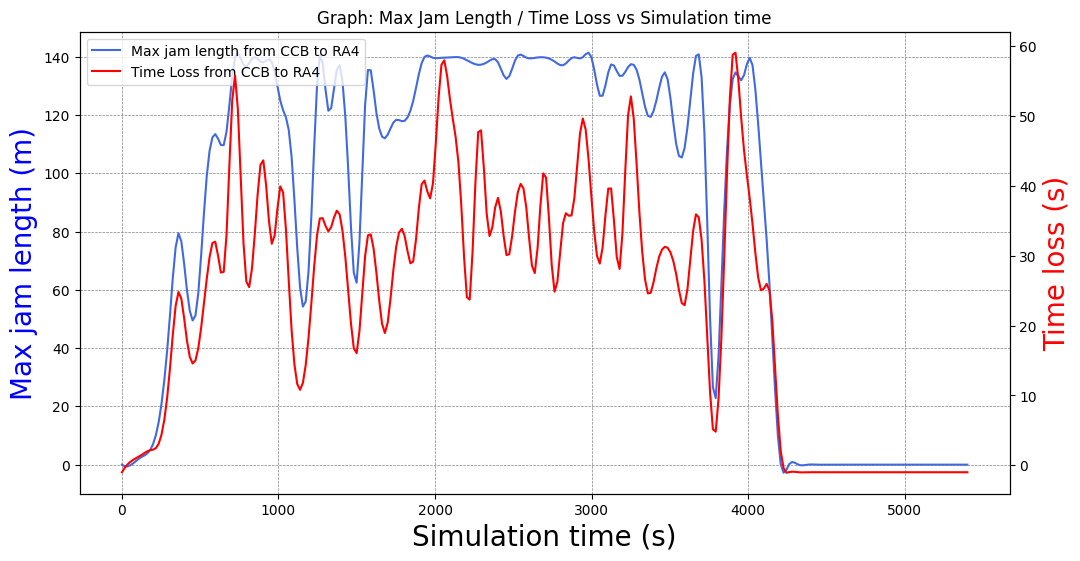

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Calculating the mean values of the "JamLength_r2ps_to_auchan_mgp" column for each simulation interval
mean_time_loss_1 = dz_ccb_to_rp4.groupby('interval_begin')['interval_meanTimeLoss'].mean()
mean_jam_length_1 = dz_ccb_to_rp4.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

# Create a new set of x values for smoother interpolation
x1_new = np.linspace(mean_jam_length_1.index.min(), mean_jam_length_1.index.max(), 300)

# Perform cubic spline interpolation for the jam length data
spline_jam_length = make_interp_spline(mean_jam_length_1.index, mean_jam_length_1)
jam_length_smooth = spline_jam_length(x1_new)

x2_new = np.linspace(mean_time_loss_1.index.min(), mean_time_loss_1.index.max(), 300)

# Perform cubic spline interpolation for the time loss data
spline_time_loss = make_interp_spline(mean_time_loss_1.index, mean_time_loss_1)
time_loss_smooth = spline_time_loss(x2_new)

# Creating the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first curve on y1-axis with curved line
ax1.plot(x1_new, jam_length_smooth, label='Max jam length from CCB to RA4', color='royalblue')
ax1.set_xlabel('Simulation time (s)')
ax1.set_ylabel('Max jam length (m)', color='blue')
ax1.tick_params('y', colors='black')

# Creating a second y2-axis
ax2 = ax1.twinx()

# Plotting the second curve on y2-axis with curved line
ax2.plot(x_new, time_loss_smooth, label='Time Loss from CCB to RA4', color='red')
ax2.set_ylabel('Time loss (s)', color='red')
ax2.tick_params('y', colors='black')

# Combining the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding the title
plt.title('Graph: Max Jam Length / Time Loss vs Simulation time')

# Increasing the font size of all axis titles
ax1.title.set_fontsize(20)
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

# Displaying the grid in the background
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Display the graph
plt.show()

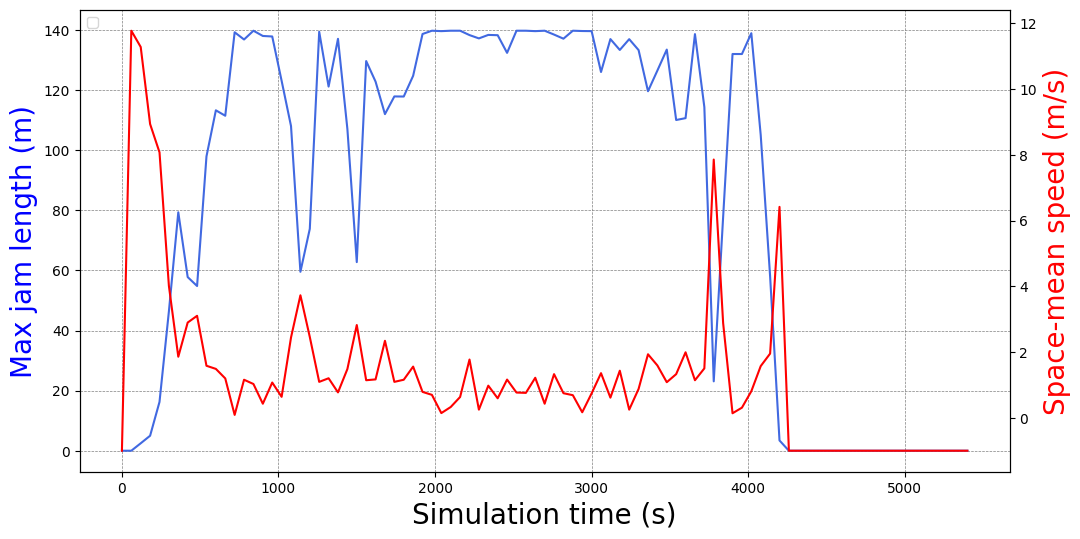

In [90]:
# Calculating the mean values of the "JamLength_r2ps_to_auchan_mgp" column for each simulation interval
mean_speed_1 = dz_ccb_to_rp4.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_jam_length_1 = dz_ccb_to_rp4.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

# Creating the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first curve on y1-axis
ax1.plot(mean_jam_length_1.index, mean_jam_length_1, color='royalblue')
ax1.set_xlabel('Simulation time (s)')
ax1.set_ylabel('Max jam length (m)', color='blue')
ax1.tick_params('y', colors='black')

# Creating a second y2-axis
ax2 = ax1.twinx()

# Plotting the second curve on y2-axis
ax2.plot(mean_speed_1.index, mean_speed_1, color='red')
ax2.set_ylabel('Space-mean speed (m/s)', color='red')
ax2.tick_params('y', colors='black')

# Combining the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding the title
#plt.title('Graph: Max jam length / Mean speed vs Simulation time')

# Increasing the font size of all axis titles
ax1.title.set_fontsize(20)
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

# Displaying the grid in the background
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

plt.gca().legend_ = None


# Display the graph
plt.show()

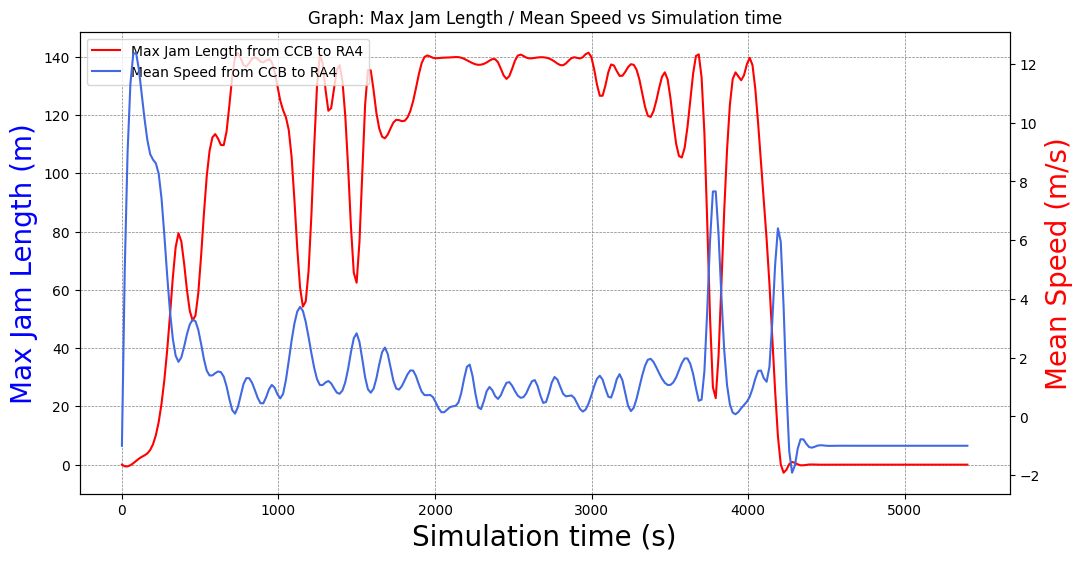

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Calculating the mean values of the "JamLength_r2ps_to_auchan_mgp" column for each simulation interval
mean_speed_1 = dz_ccb_to_rp4.groupby('interval_begin')['interval_meanSpeed'].mean()
mean_jam_length_1 = dz_ccb_to_rp4.groupby('interval_begin')['interval_maxJamLengthInMeters'].mean()

# Create a new set of x values for smoother interpolation
x1_new = np.linspace(mean_jam_length_1.index.min(), mean_jam_length_1.index.max(), 300)

# Perform cubic spline interpolation for the jam length data
spline_jam_length = make_interp_spline(mean_jam_length_1.index, mean_jam_length_1)
jam_length_smooth = spline_jam_length(x1_new)

x2_new = np.linspace(mean_speed_1.index.min(), mean_speed_1.index.max(), 300)

# Perform cubic spline interpolation for the mean speed data
spline_mean_speed = make_interp_spline(mean_speed_1.index, mean_speed_1)
mean_speed_smooth = spline_mean_speed(x2_new)

# Creating the graph
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the first curve on y1-axis with curved line
ax1.plot(x1_new, jam_length_smooth, label='Max Jam Length from CCB to RA4', color='red')
ax1.set_xlabel('Simulation time (s)')
ax1.set_ylabel('Max Jam Length (m)', color='blue')
ax1.tick_params('y', colors='black')

# Creating a second y2-axis
ax2 = ax1.twinx()

# Plotting the second curve on y2-axis with curved line
ax2.plot(x2_new, mean_speed_smooth, label='Mean Speed from CCB to RA4', color='royalblue')
ax2.set_ylabel('Mean Speed (m/s)', color='red')
ax2.tick_params('y', colors='black')

# Combining the legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adding the title
plt.title('Graph: Max Jam Length / Mean Speed vs Simulation time')

# Increasing the font size of all axis titles
ax1.title.set_fontsize(20)
ax1.xaxis.label.set_fontsize(20)
ax1.yaxis.label.set_fontsize(20)
ax2.yaxis.label.set_fontsize(20)

# Displaying the grid in the background
ax1.grid(color='gray', linestyle='--', linewidth=0.5)
ax1.set_axisbelow(True)

# Display the graph
plt.show()

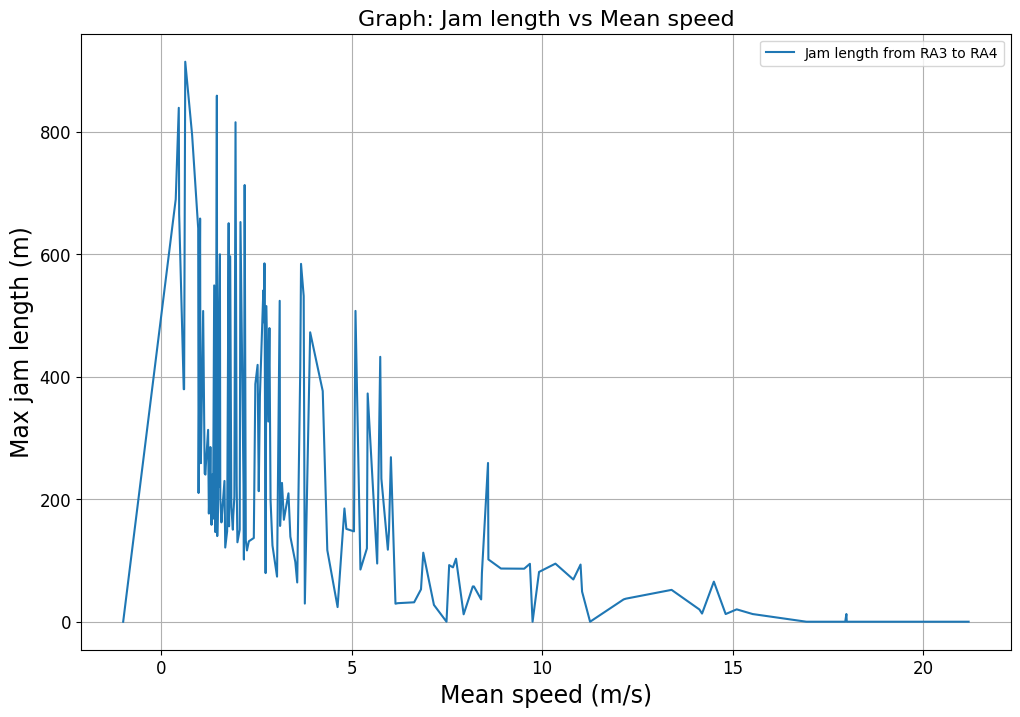

In [25]:
# Adjusting the size of the graph
plt.figure(figsize=(12, 8))

# Calculate the average of interval_maxJamLengthInMeters
mean_jam_length = dz_r2ps_to_ach1_mgp.groupby('interval_meanSpeed')['interval_maxJamLengthInMeters'].mean()

# Plotting the average jam length
mean_jam_length.plot(label='Jam length from RA3 to RA4')

plt.title('Graph: Jam length vs Mean speed', fontsize=16)
plt.legend()
plt.xlabel('Mean speed (m/s)', fontsize=17)
plt.ylabel('Max jam length (m)', fontsize=17)
plt.grid(True)

# Increasing the font size of the axes labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the graph
plt.show()


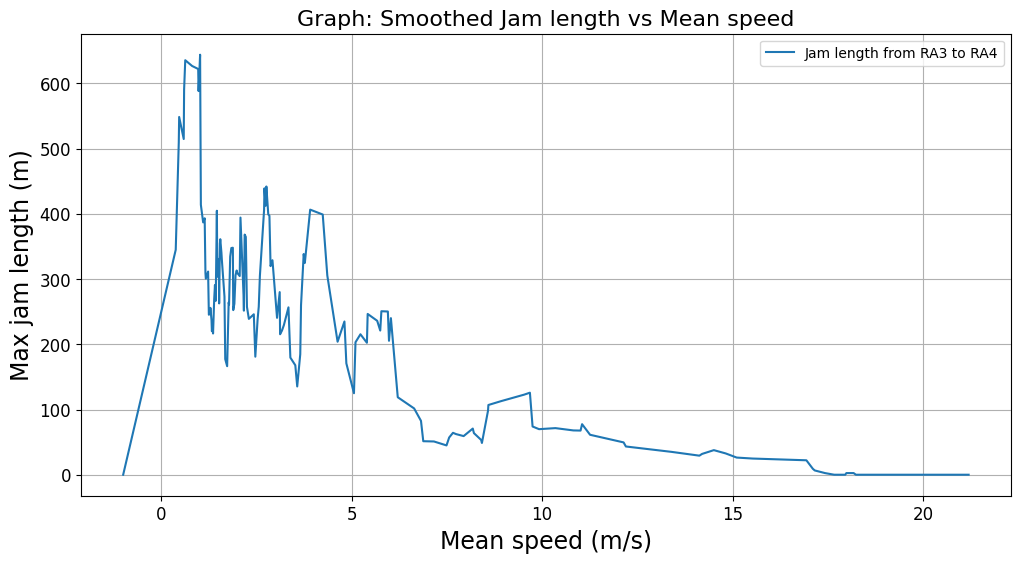

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

# Adjusting the size of the graph
plt.figure(figsize=(12, 6))

# Calculate the average of interval_maxJamLengthInMeters
mean_jam_length = dz_r2ps_to_ach1_mgp.groupby('interval_meanSpeed')['interval_maxJamLengthInMeters'].mean()

# Apply a rolling mean to smooth the data
window_size = 5  # Adjust the window size as desired
mean_jam_length_smooth = mean_jam_length.rolling(window=window_size, min_periods=1).mean()

# Plotting the smoothed average jam length
mean_jam_length_smooth.plot(label='Jam length from RA3 to RA4')

plt.title('Graph: Smoothed Jam length vs Mean speed', fontsize=16)
plt.legend()
plt.xlabel('Mean speed (m/s)', fontsize=17)
plt.ylabel('Max jam length (m)', fontsize=17)
plt.grid(True)

# Increasing the font size of the axes labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the graph
plt.show()

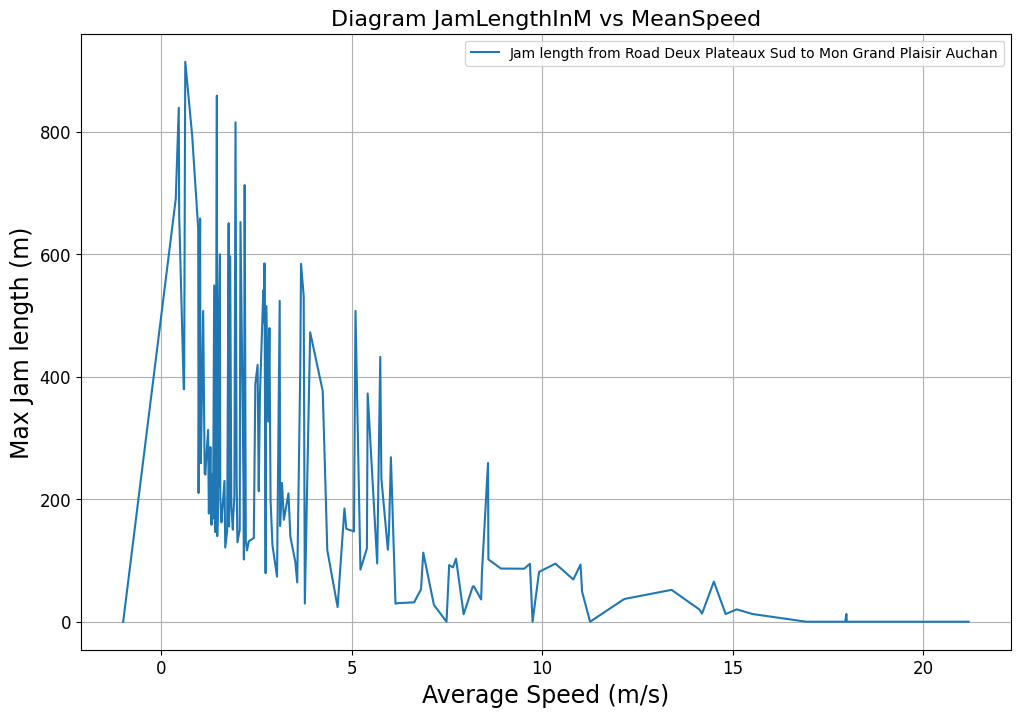

In [27]:
# Graph Speed and JamLength
# Adjusting the size of the graph
plt.figure(figsize=(12, 8))

# Calculate the average of interval_maxJamLengthInMeters
mean_jam_length = dz_r2ps_to_ach1_mgp.groupby('interval_meanSpeed')['interval_maxJamLengthInMeters'].mean()

# Plotting the average jam length
mean_jam_length.plot(label='Jam length from Road Deux Plateaux Sud to Mon Grand Plaisir Auchan')

plt.title('Diagram JamLengthInM vs MeanSpeed', fontsize=16)
plt.legend()
plt.xlabel('Average Speed (m/s)', fontsize=17)
plt.ylabel('Max Jam length (m)', fontsize=17)
plt.grid(True)

# Increasing the size of the axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the graph
plt.show()

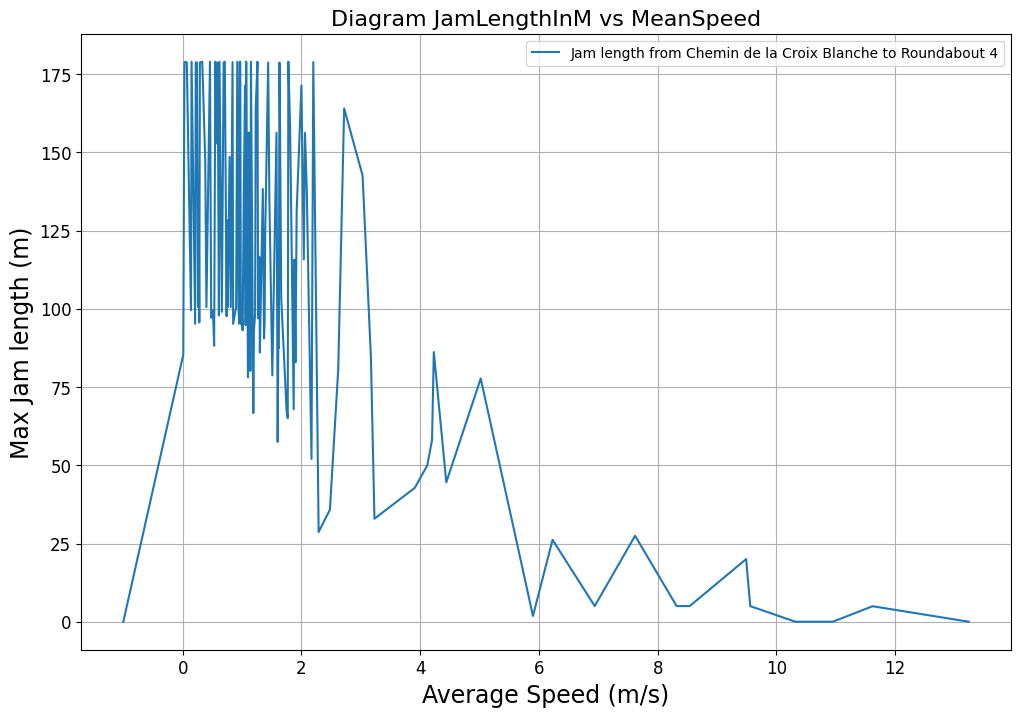

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

# Graph Speed and JamLength
# Adjusting the size of the graph
plt.figure(figsize=(12, 8))

# Calculate the average of interval_maxJamLengthInMeters
mean_jam_length = dz_ccb_to_rp4.groupby('interval_meanSpeed')['interval_maxJamLengthInMeters'].mean()

# Plotting the average jam length
mean_jam_length.plot(label='Jam length from Chemin de la Croix Blanche to Roundabout 4')

plt.title('Diagram JamLengthInM vs MeanSpeed', fontsize=16)
plt.legend()
plt.xlabel('Average Speed (m/s)', fontsize=17)
plt.ylabel('Max Jam length (m)', fontsize=17)
plt.grid(True)

# Increasing the font size of the axes labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the graph
plt.show()


In [48]:
de_r2ps_to_ach1_mgp = pd.read_csv('data_edges/e_r2ps_to_ach1_mgp.csv')
de_rp1 = pd.read_csv('data_edges/e_rp1.csv')
de_ccb_to_rp4 = pd.read_csv('data_edges/e_ccb_to_rp4.csv')
de_rp2_to_rp3 = pd.read_csv('data_edges/e_rp2_to_rp3.csv')
de_rp3_to_rp4 = pd.read_csv('data_edges/e_rp3_to_rp4.csv')
de_rp4_to_rp3 = pd.read_csv('data_edges/e_rp4_to_rp3.csv')
de_rp5_to_rp4 = pd.read_csv('data_edges/e_rp5_to_rp4.csv')
#de_rp4_to_rp3.dtypes
de_r2ps_to_ach1_mgp.dtypes
#de_rp1.dtypes
#de_ccb_to_rp4.dtypes
#de_rp2_to_rp3.dtypes
#de_rp3_to_rp4.dtypes
#de_rp4_to_rp3.dtypes
#de_rp5_to_rp4.dtypes

interval_begin            float64
interval_end              float64
interval_id                object
edge_arrived                int64
edge_density              float64
edge_departed               int64
edge_entered                int64
edge_id                    object
edge_laneChangedFrom        int64
edge_laneChangedTo          int64
edge_laneDensity          float64
edge_left                   int64
edge_occupancy            float64
edge_overlapTraveltime    float64
edge_sampledSeconds       float64
edge_speed                float64
edge_speedRelative        float64
edge_timeLoss             float64
edge_traveltime           float64
edge_waitingTime          float64
dtype: object

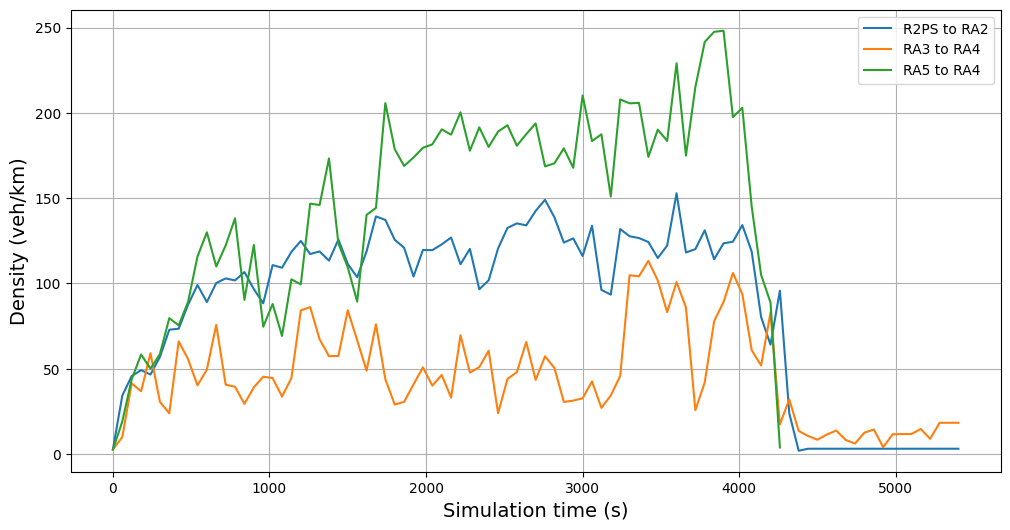

In [78]:
import matplotlib.pyplot as plt

datasets = [
    (de_r2ps_to_ach1_mgp, "R2PS to RA2"),
    (de_rp3_to_rp4, "RA3 to RA4"),
    (de_rp5_to_rp4, "RA5 to RA4")
]

plt.figure(figsize=(12, 6))

for dataset, label in datasets:
    # Compute mean jam length
    edge_density = dataset.groupby('interval_begin')['edge_density'].mean()
    plt.plot(edge_density.index, edge_density, label=label)

#plt.title('Diagram Density vs Simulation time')
plt.legend()
plt.xlabel('Simulation time (s)', fontsize=14)
plt.ylabel('Density (veh/km)', fontsize=14)
plt.grid(True)

# Display the plot
plt.show()

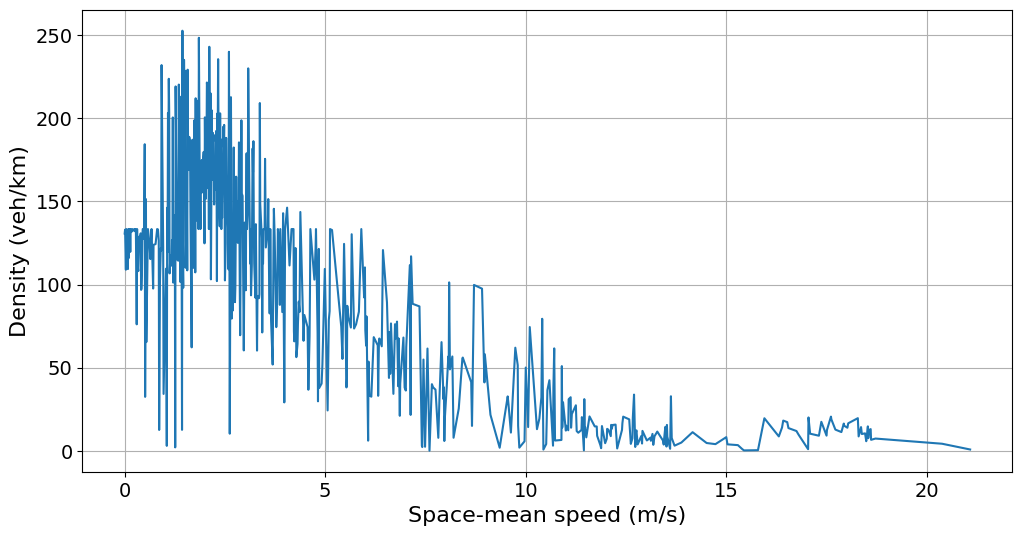

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Check if there are any missing values in the dataset
if de_r2ps_to_ach1_mgp['edge_density'].isnull().any():
    # Perform interpolation on the dataset
    de_r2ps_to_ach1_mgp['edge_density'] = de_r2ps_to_ach1_mgp['edge_density'].interpolate()

# Convert 'edge_density' column to numeric type
de_r2ps_to_ach1_mgp['edge_density'] = pd.to_numeric(de_r2ps_to_ach1_mgp['edge_density'], errors='coerce')

# Plot the data
de_r2ps_to_ach1_mgp.groupby('edge_speed')['edge_density'].mean().plot()

#plt.title('Graph Density vs Average Speed', fontsize=20)
plt.legend(fontsize=14)
plt.xlabel('Space-mean speed (m/s)', fontsize=16)
plt.ylabel('Density (veh/km)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)

plt.gca().legend_ = None


plt.show()

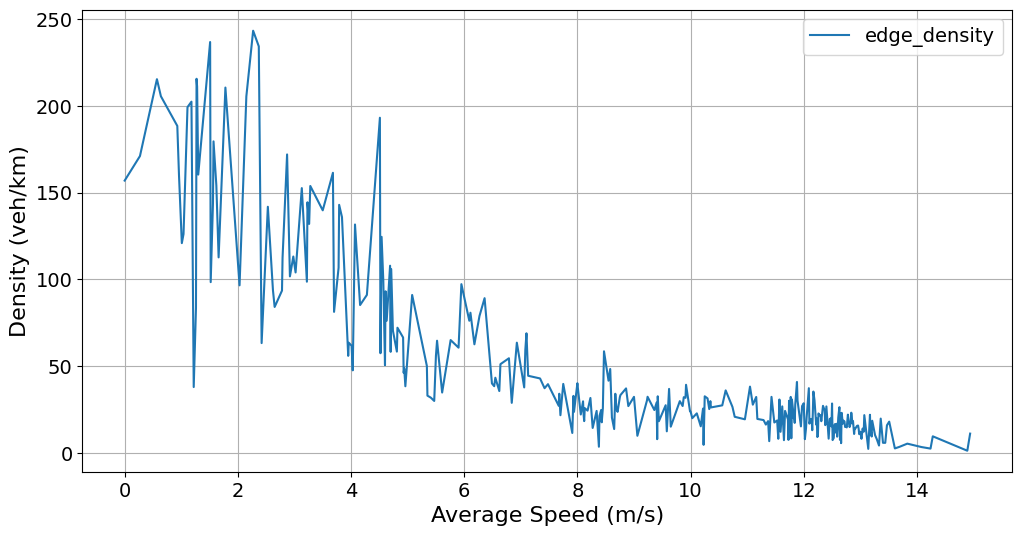

In [97]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Convert 'edge_density' column to numeric data type
de_rp3_to_rp4['edge_density'] = pd.to_numeric(de_rp3_to_rp4['edge_density'], errors='coerce')

# Check if there are any missing values in the dataset
if de_rp3_to_rp4['edge_density'].isnull().any():
    # Perform interpolation on the dataset
    de_rp3_to_rp4['edge_density'] = de_rp3_to_rp4['edge_density'].interpolate()

# Plot the data
de_rp3_to_rp4.groupby('edge_speed')['edge_density'].mean().plot()

plt.legend(fontsize=14)
plt.xlabel('Average Speed (m/s)', fontsize=16)
plt.ylabel('Density (veh/km)', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()